In [ ]:
import os
import pandas as pd
from PIL import Image
import torch
from torchvision.transforms import ToTensor
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import numpy as np


In [ ]:
input_dir = "/kaggle/input/blood-vessel-segmentation/"

### ¿What are the files like?

In [ ]:
k1_dense_path = f"{input_dir}train/kidney_1_dense/"
k1_dense_imgs = pd.Series(os.listdir(f"{k1_dense_path}images")).sort_values().reset_index(drop=True)
k1_dense_labels = pd.Series(os.listdir(f"{k1_dense_path}labels")).sort_values().reset_index(drop=True)

display(k1_dense_imgs)
display(k1_dense_labels)

#### ¿How many of them are there?

In [ ]:
k1_dense_imgs.nunique(), k1_dense_labels.nunique() 

### ¿All the images and masks have the same shapes?

In [ ]:
# check if all the images have the same shape
images_shapes = []
for idx in tqdm(range(len(k1_dense_imgs))):
    image = Image.open(k1_dense_path + "images/" + k1_dense_imgs[idx])
    images_shapes.append((image.height, image.width))

images_shapes = set(images_shapes)
images_shapes

In [ ]:
# check if all the labels have the same shape
labels_shapes = []
for idx in tqdm(range(len(k1_dense_labels))):
    image = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])
    labels_shapes.append((image.height, image.width))

labels_shapes = set(labels_shapes)
labels_shapes

### ¿What are the values of the masks?

In [ ]:
mask_values = set()
for idx in tqdm(range(len(k1_dense_labels))):
    label = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])
    mask_values.update(ToTensor()(label).unique().tolist())
print(mask_values)

### ¿What is the proportion of blank masks?

In [ ]:
c = 0
for idx in tqdm(range(len(k1_dense_labels))):
    label = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])
    all_blank = (~ToTensor()(label).bool()).all()
    c = c + 1 if all_blank else c
print(f"Proportion of blank masks {c / len(k1_dense_labels) * 100 :.2f}%")

### ¿What about the values of the images?

In [ ]:
idx = random.randint(0, len(k1_dense_imgs))

image = ToTensor()(Image.open(k1_dense_path + "images/" + k1_dense_imgs[idx]))

plt.hist(image.view(-1).numpy(), 50) 

plt.title(f'Histogram of Tensor Values of image {idx}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

**Observation**

- As we can see the array values of some images take very different shapes.

### Let's look at some examples

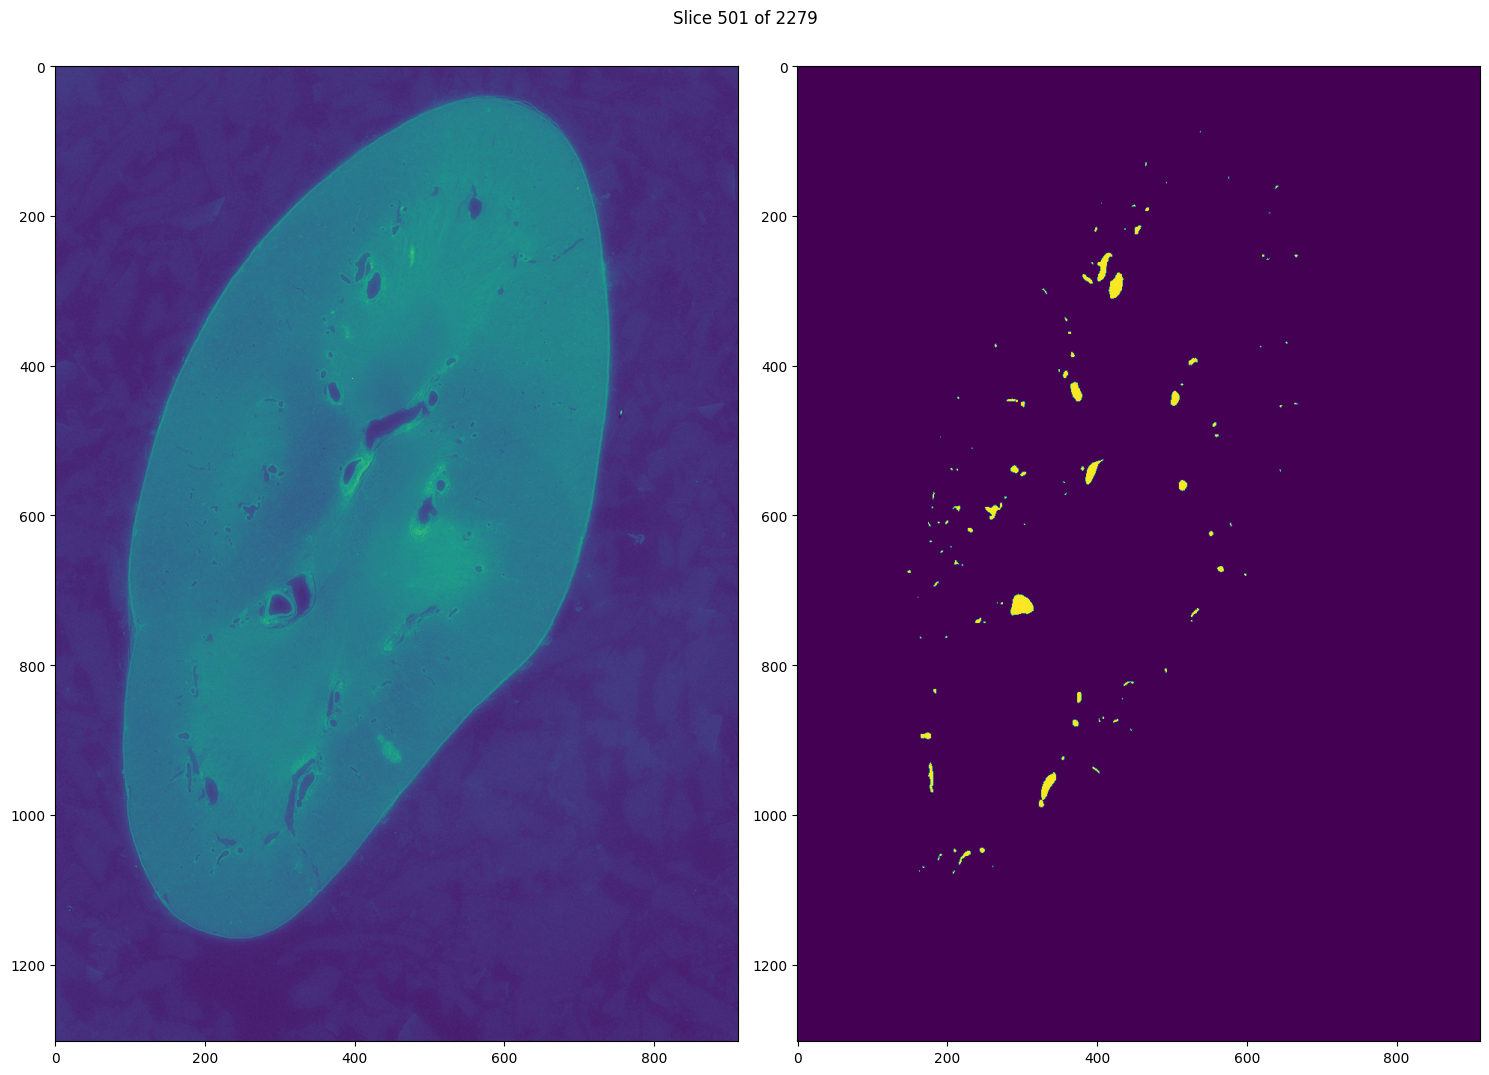

In [20]:
# idx = random.randint(0, len(k1_dense_imgs))
idx = 500

image = Image.open(k1_dense_path + "images/" + k1_dense_imgs[idx])
label = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
ax[0].imshow(image)
ax[1].imshow(label)
fig.suptitle(f"Slice {idx + 1} of {len(k1_dense_imgs)}")
plt.tight_layout()
plt.show()

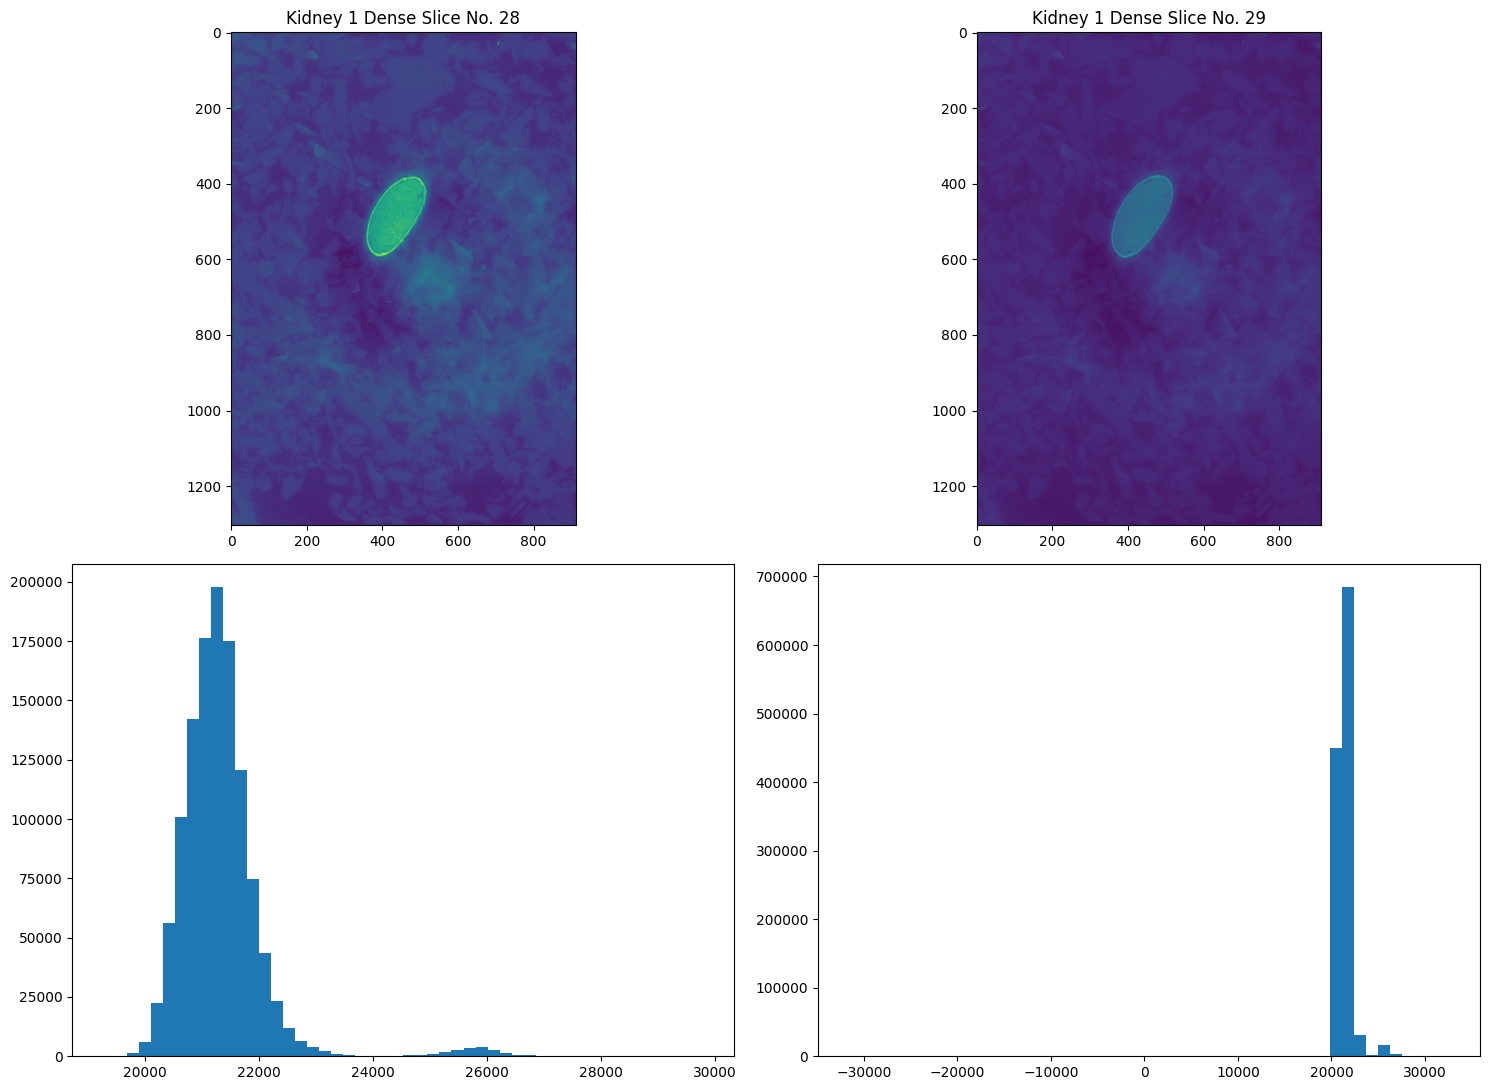

In [19]:
img1 = Image.open(k1_dense_path + "images/" + k1_dense_imgs[27])
img2 = Image.open(k1_dense_path + "images/" + k1_dense_imgs[28])
fig, ax = plt.subplots(2, 2, figsize=(15, 11))
ax[0, 0].set_title(f"Kidney 1 Dense Slice No. 28")
ax[0, 1].set_title(f"Kidney 1 Dense Slice No. 29")
ax[0, 0].imshow(img1)
ax[0, 1].imshow(img2)
ax[1, 0].hist(ToTensor()(img1).view(-1).numpy(), 50)
ax[1, 1].hist(ToTensor()(img2).view(-1).numpy(), 50)
plt.tight_layout()
plt.show()

**Observations**

- There seems to be background and kidney. The actual kidney section in the image varies in size from image to image.
- The blood vessels are generaly round.
    - They also seem to have a "light" border.
- Most annnotations are REALLY small.
- There are big intensity variations, compare slices 28 and 29. ¿Why is this?
- There are some artifacts, like really bright and really dark spots.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
import imageio
import os

# Define the function to update the plot
def update_plot(idx):
    if idx % 100 == 0: print(idx)
    # Clear the current plot
    ax[0].clear()
    ax[1].clear()

    # Load the image and label
    image = Image.open(k1_dense_path + "images/" + k1_dense_imgs[idx])
    label = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])

    # Display the image and label
    ax[0].imshow(image)
    ax[1].imshow(label)
    fig.suptitle(f"Slice {idx + 1} of {len(k1_dense_imgs)}")
    plt.tight_layout()

# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 11))

# Create the animation
anim = animation.FuncAnimation(fig, update_plot, frames=len(k1_dense_imgs), interval=100)
anim.save('animation.mp4', writer='ffmpeg')